<a href="https://colab.research.google.com/github/brito-bernardo/osmnx/blob/main/FilteringNodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 2.1 MB/s eta 0:00:00


In [2]:
import osmnx as ox
import networkx as nx

In [14]:
place_name = "Porto, Portugal"

G = ox.graph_from_place(place_name, network_type = 'drive')

In [29]:
G = ox.project_graph(G, to_crs="EPSG:3857")

In [30]:
#Start of Wrong Logical Thinking to filter nodes type only "drive"
G_drive_nodes = G.copy()
nodes_to_remove = []

for node, data in G_drive_nodes.nodes(data=True):
  if 'network_type' not in data or data['network_type'] != 'drive':
    nodes_to_remove.append(node)

In [31]:
G_drive_nodes.remove_nodes_from(nodes_to_remove)

In [32]:
G_drive_consolidated = ox.consolidate_intersections(G_drive_nodes, tolerance = 15, rebuild_graph=True, dead_ends=True, reconnect_edges=True)

In [33]:
import matplotlib.pyplot as plt



5029


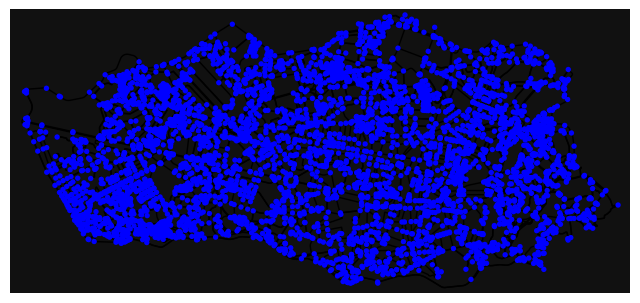

In [35]:
#Wrong Idea nothing happens

G_drive_nodes = G.copy()
nodes_to_remove = []
print(G.number_of_nodes())

for node, data in G_drive_nodes.nodes(data=True):
    if 'network_type' not in data:
        G_drive_nodes.nodes[node]['network_type'] = 'drive'
    elif data['network_type'] != 'drive':
        nodes_to_remove.append(node)

G_drive_nodes.remove_nodes_from(nodes_to_remove)

if G_drive_nodes.number_of_nodes() > 0:
    #G_drive_consolidated = ox.consolidate_intersections(G_drive_nodes, tolerance=20, rebuild_graph=True, dead_ends=False, reconnect_edges=False)

    ox.plot_graph(ox.project_graph(G_drive_nodes, to_crs="EPSG:4326"), node_color='b', edge_color='k')
else:
    print("O gráfico consolidado não contém nós do tipo 'drive'. Verifique os parâmetros de consolidação e os dados da cidade.")